In [41]:
import numpy as np
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from scipy.spatial import distance
from matplotlib.colors import LinearSegmentedColormap

## 그림을 선명하게 만들어주는 라이브러리
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' ## 그림 더 선명하게, 한글 폰트 지정도 필요 없음

import warnings
warnings.filterwarnings(action='ignore')

In [8]:
hall=pd.read_csv('final_data.csv', low_memory=False)

In [9]:
df=hall.copy()

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/msgothic.ttc"

font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams["font.family"] = font_prop.get_name()

In [13]:
seat=pd.read_csv('seat_coor.csv')

### 좌석 복구

In [47]:
df[df.label==637].seat_level.value_counts()

seat_level
free       743
R_price    366
A_price    146
B_price    145
S_price     94
Name: count, dtype: int64

In [48]:
df[df.label==637].grade.value_counts()

grade
R_price    739
S_price    379
A_price    212
B_price    164
Name: count, dtype: int64

In [49]:
condition=(df.label==637)

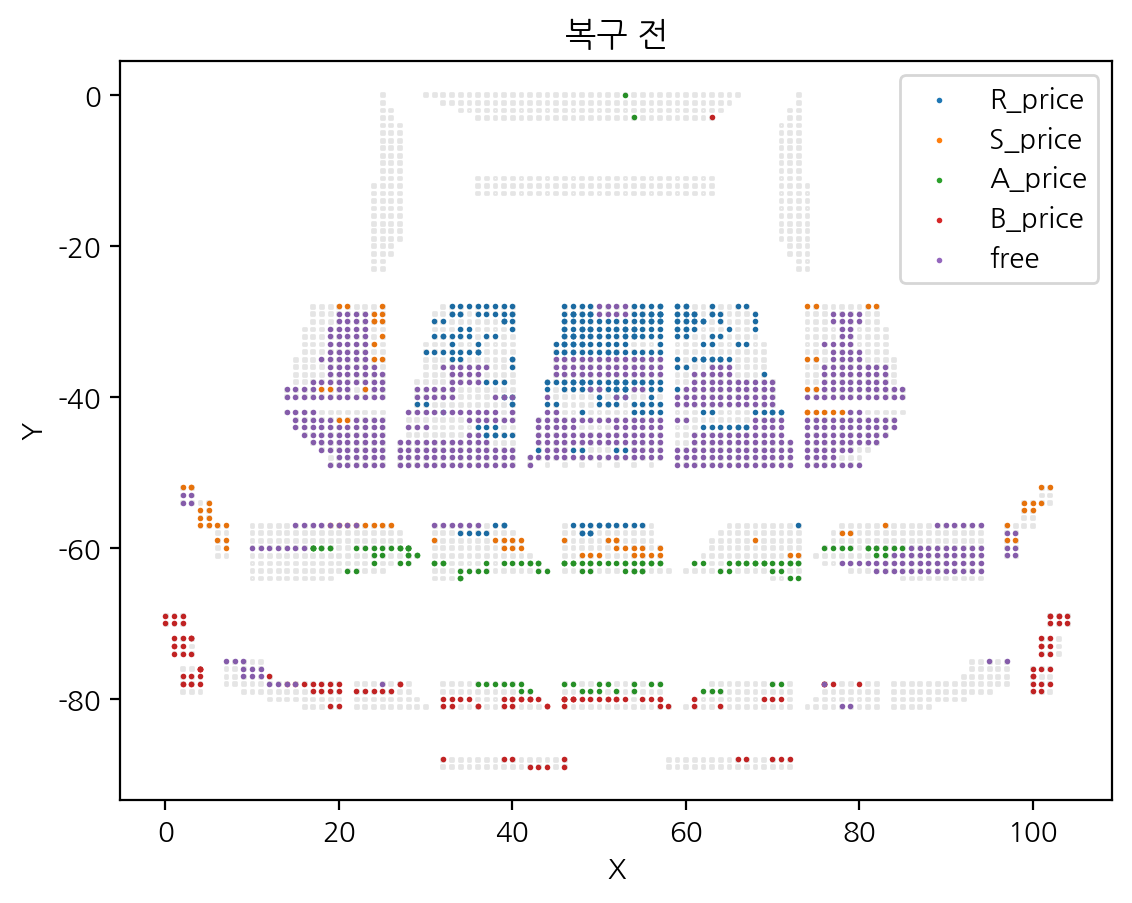

In [50]:
x_coords2, y_coords2 = seat['x'], seat['y']
desired_order = ['R_price']+['S_price']+[val for val in sorted(df[condition&(df.seat_level!='R_price')&(df.seat_level!='S_price')].seat_level.unique())]
grouped = df[condition].groupby(pd.Categorical(df[condition].seat_level, categories=desired_order, ordered=True))
# 각 그룹에 대해 색상과 레이블 설정하여 산점도 그리기
for group_name, group_data in grouped:
    plt.scatter(group_data["x"], group_data["y"], label=group_name, s=1)

plt.scatter(x_coords2, y_coords2, marker='s', edgecolors='black', facecolors='none', s=1, linewidths=1, alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('복구 전')
plt.show()

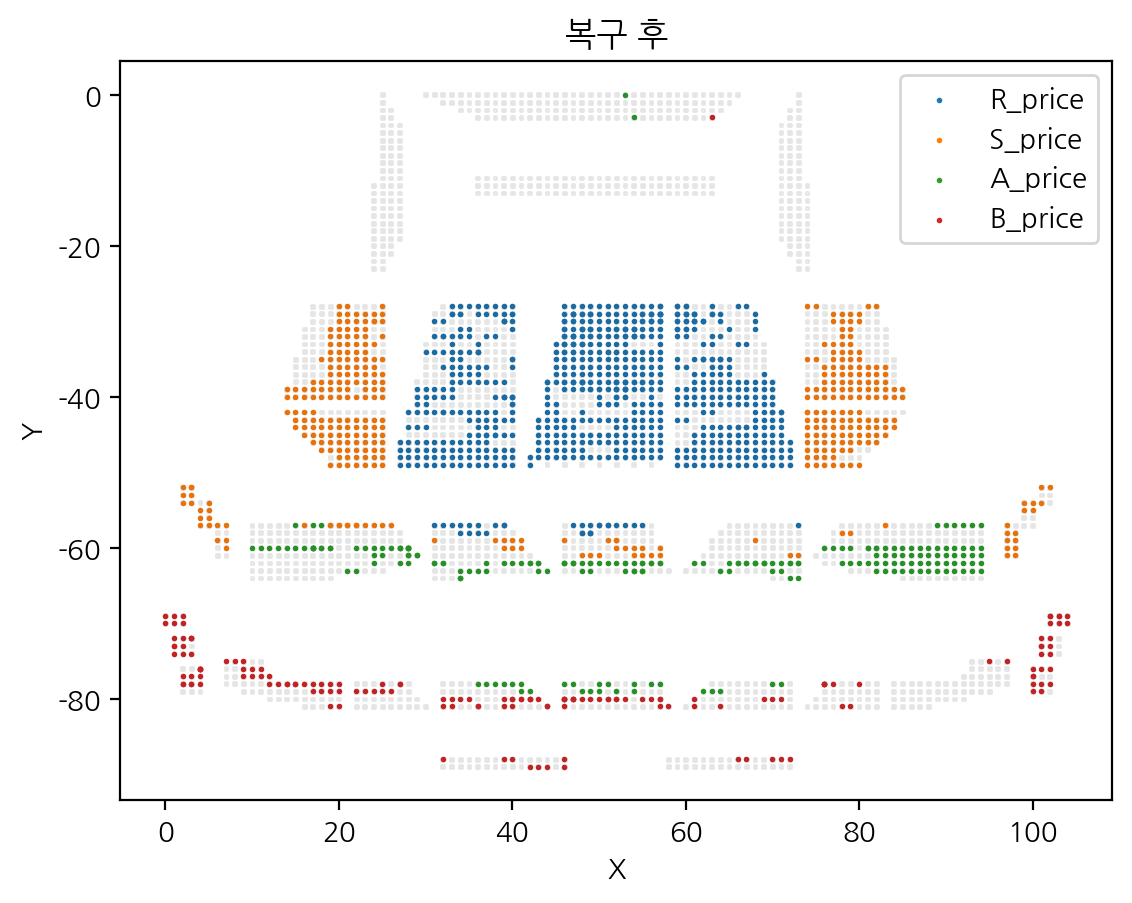

In [51]:
x_coords2, y_coords2 = seat['x'], seat['y']
desired_order = ['R_price']+['S_price']+[val for val in sorted(df[condition&(df.grade!='R_price')&(df.grade!='S_price')].grade.unique())]
grouped = df[condition].groupby(pd.Categorical(df[condition].grade, categories=desired_order, ordered=True))
# 각 그룹에 대해 색상과 레이블 설정하여 산점도 그리기
for group_name, group_data in grouped:
    plt.scatter(group_data["x"], group_data["y"], label=group_name, s=1)

plt.scatter(x_coords2, y_coords2, marker='s', edgecolors='black', facecolors='none', s=1, linewidths=1, alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('복구 후')
plt.show()